In [2]:
import allel
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import zarr
import dask
import malariagen_data
ag3 = malariagen_data.Ag3("gs://vo_agam_release/")
#from dask.diagnostics import ProgressBar
#ProgressBar().register()
# quieten dask warnings about large chunks
dask.config.set(**{'array.slicing.split_large_chunks': True})

In [3]:
samples = pd.read_csv('../Data/Meta/west_africa_phase3_n2.csv', delimiter=',').drop(columns='Unnamed: 0')
samples.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,longitude,latitude,sex_call,...,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,species,locspe,population,2La_type,2Rd_type,pca_pops,pca_country
0,AB0085-Cx,BF2-4,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,2.0,gamb_colu,gambiae,gambiae,2012_Burkina Faso_Pala_gambiae,SBF1_12,2La_alt,2Rd_hom,An.gam,BFgam
1,AB0086-Cx,BF2-6,Austin Burt,Burkina Faso,Pala,2012,7,-4.235,11.150,F,...,2.0,gamb_colu,gambiae,gambiae,2012_Burkina Faso_Pala_gambiae,SBF1_12,2La_alt,2Rd_hom,An.gam,BFgam
2,AB0087-C,BF3-3,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,2.0,gamb_colu,coluzzii,coluzzii,2012_Burkina Faso_Bana_coluzzii,MBF2_12,2La_alt,2Rd_hom,An.col,BFcol
3,AB0088-C,BF3-5,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,2.0,gamb_colu,coluzzii,coluzzii,2012_Burkina Faso_Bana_coluzzii,MBF2_12,2La_alt,2Rd_hom,An.col,BFcol
4,AB0089-Cx,BF3-8,Austin Burt,Burkina Faso,Bana,2012,7,-4.472,11.233,F,...,2.0,gamb_colu,coluzzii,coluzzii,2012_Burkina Faso_Bana_coluzzii,MBF2_12,2La_alt,2Rd_hom,An.col,BFcol


In [4]:
subpops = {
    'An_gam': samples[samples.pca_pops == 'An.gam'].index.tolist(),
    'gcx1': samples[samples.pca_pops == 'GM-2'].index.tolist() + samples[samples.pca_pops == 'GW'].index.tolist(),
    'all': samples[samples.pca_pops == 'An.gam'].index.tolist() + samples[samples.pca_pops == 'GM-2'].index.tolist() + samples[samples.pca_pops == 'GW'].index.tolist(),
}

In [5]:
#remove arabiensis
sel1 = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])
#remove locations with <5 individuals
sel2 = np.array([True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True])

--------------------------

----------------------
## Diagnostic Markers

In [29]:
contigs = ['X','2L','2R','3L','3R']

In [1]:
d = {}

In [31]:
for chrom in contigs:
    print('Computing POS, REF, ALT for Chromosome %s' %chrom)

    pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
    ref = ag3.snp_sites(chrom, 'REF', site_mask='gamb_colu').compute()
    alt = ag3.snp_sites(chrom, 'ALT', site_mask='gamb_colu')[:,0].compute()
    print('Computing Genotype Calls for Chromosome %s' %chrom)
    gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
         "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
    gt = allel.GenotypeDaskArray(gt)
    gt = gt.subset(sel1 = sel1)
    gt = gt.subset(sel1 = sel2)
    print('Computing Allele Counts')
    allele_counts = gt.count_alleles_subpops(subpops)
    print('Computing Biallelic loci')
    ac_biallel = allele_counts['all'].is_biallelic().compute()
    print('Subset POS, REF, ALT to biallelic loci')
    pos_biallel = pos[ac_biallel]
    ref_biallel = ref[ac_biallel] 
    alt_biallel = alt[ac_biallel]
    print("Total positions: %s \n" "Total biallelic positions: %s" %(len(pos),len(pos_biallel)))
    ac_gm2 = allel.AlleleCountsDaskArray(allele_counts['gcx1'][ac_biallel].compute())
    ac_ga = allel.AlleleCountsDaskArray(allele_counts['An_gam'][ac_biallel].compute())
    print('Computing gcx1 Frequencies')
    ac_gm2_freq = ac_gm2.to_frequencies().compute().round(decimals=3)
    print('Computing GA Frequencies')
    ac_ga_freq = ac_ga.to_frequencies().compute().round(decimals=3)
    print('Computing ALT gcx1 SNPs with frequency > 0.85')
    pos_aims_alt = pos_biallel[ac_gm2_freq[:,1] - ac_ga_freq[:,1] >= 0.85]
    print('Computing REF gcx1 SNPs with frequency > 0.85')
    pos_aims_ref = pos_biallel[ac_gm2_freq[:,0] - ac_ga_freq[:,0] >= 0.85]
    pos_aims = np.sort(np.concatenate((pos_aims_ref,pos_aims_alt),axis=0))
    
    d[chrom] = pd.DataFrame()
    d[chrom]['POS'] = pd.Series(pos_biallel[pos_biallel.locate_keys(pos_aims)])
    d[chrom]['REF'] = ref_biallel[pos_biallel.locate_keys(pos_aims)]
    d[chrom]['ALT']  = alt_biallel[pos_biallel.locate_keys(pos_aims)]
    d[chrom]['freq_gcx1_alt'] = ac_gm2_freq[:,1][pos_biallel.locate_keys(pos_aims)]
    d[chrom]['freq_GA_alt'] = ac_ga_freq[:,1][pos_biallel.locate_keys(pos_aims)]
    d[chrom]['freq_gcx1_ref'] = ac_gm2_freq[:,0][pos_biallel.locate_keys(pos_aims)]
    d[chrom]['freq_GA_ref'] = ac_ga_freq[:,0][pos_biallel.locate_keys(pos_aims)]
    d[chrom]['chrom'] = chrom
    
    
    
    print('Building Chromosome %s Dataframe' %chrom)

Computing POS, REF, ALT for Chromosome X
Computing Genotype Calls for Chromosome X
Computing Allele Counts
Computing Biallelic loci
Subset POS, REF, ALT to biallelic loci
Total positions: 16362809 
Total biallelic positions: 2131920
Computing gcx1 Frequencies
Computing GA Frequencies
Computing ALT gcx1 SNPs with frequency > 0.85
Computing REF gcx1 SNPs with frequency > 0.85
Building Chromosome X Dataframe
Computing POS, REF, ALT for Chromosome 2L
Computing Genotype Calls for Chromosome 2L
Computing Allele Counts
Computing Biallelic loci
Subset POS, REF, ALT to biallelic loci
Total positions: 36005131 
Total biallelic positions: 4697777
Computing gcx1 Frequencies
Computing GA Frequencies
Computing ALT gcx1 SNPs with frequency > 0.85
Computing REF gcx1 SNPs with frequency > 0.85
Building Chromosome 2L Dataframe
Computing POS, REF, ALT for Chromosome 2R
Computing Genotype Calls for Chromosome 2R
Computing Allele Counts
Computing Biallelic loci
Subset POS, REF, ALT to biallelic loci
Total 

In [35]:
d.keys()

dict_keys(['X', '2L', '2R', '3L', '3R'])

In [46]:
d.to_csv('geno_gcx1_markers.csv', sep = ';')

-------------------------------------------

### Genotyping

In [47]:
contigs = ['2R','2L','X']

In [ ]:
df = pd.read_csv('geno_gcx1_markers.csv', sep=';').drop(columns='Unnamed: 0')

In [49]:
for chrom in contigs:
    pos_gm2 = allel.SortedIndex(np.array(df[df.chrom==chrom].POS))
    pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
    loc1, loc2 = pos.locate_intersection(pos_gm2)
    gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
    gt = allel.GenotypeDaskArray(gt)
    gt = gt.subset(sel0=loc1,sel1 = sel1)
    gt_chrom_aims = gt.subset(sel1 = sel2)   
    for i in range(len(gt_chrom_aims)):
        print('Missing Genotypes in Chromosome %s for allele %s : %s' %(chrom, i, gt_chrom_aims[i].count_missing()))

Missing Genotypes in Chromosome 2R for allele 0 : 1155
Missing Genotypes in Chromosome 2R for allele 1 : 1164
Missing Genotypes in Chromosome 2L for allele 0 : 1188
Missing Genotypes in Chromosome 2L for allele 1 : 1188
Missing Genotypes in Chromosome 2L for allele 2 : 1188
Missing Genotypes in Chromosome 2L for allele 3 : 971
Missing Genotypes in Chromosome 2L for allele 4 : 1073
Missing Genotypes in Chromosome 2L for allele 5 : 975
Missing Genotypes in Chromosome 2L for allele 6 : 966
Missing Genotypes in Chromosome 2L for allele 7 : 954
Missing Genotypes in Chromosome 2L for allele 8 : 973
Missing Genotypes in Chromosome 2L for allele 9 : 1000
Missing Genotypes in Chromosome X for allele 0 : 1185
Missing Genotypes in Chromosome X for allele 1 : 1166


In [ ]:
geno_gcx1 = {}

In [ ]:
for chrom in contigs:
    pos_gm2 = allel.SortedIndex(np.array(df[df.chrom==chrom].POS))
    pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
    loc1, loc2 = pos.locate_intersection(pos_gm2)
    gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
    gt = allel.GenotypeDaskArray(gt)
    gt = gt.subset(sel0=loc1,sel1 = sel1)
    gt_chrom_aims = gt.subset(sel1 = sel2)
    g_reshaped = np.transpose(gt_chrom_aims.to_n_alt(fill=-1).compute(), (1,0))
    g_reshaped_df = pd.DataFrame((g_reshaped).astype(str))
    d_aims = {
      '-1':"MISS",
      '0': "REF",
      '1': "HET",
      '2': 'ALT'
    }
    geno_gcx1[chrom] = g_reshaped_df.replace(d_aims)

In [ ]:
geno_gcx1 = pd.concat([v for k,v in geno_gcx1.items()], axis=1)
geno_gcx1

In [ ]:
gm2_pos = df.chrom +":"+ df.POS.astype(str)

In [ ]:
list = gm2_pos
geno_gcx1.columns = list

In [ ]:
geno_gcx1

In [ ]:
#geno_gcx1.to_csv('geno_aims.csv')

In [ ]:
geno_gcx1_T = geno_gcx1.T.reset_index().drop(columns='index')
geno_gcx1_T.head()

In [ ]:
#df = df.drop(columns=["Unnamed: 0","POS"])
df['gcx1_allele_REF_ALT'] = np.where(df['freq_gcx1_alt'] > df['freq_gcx1_ref'], 'ALT', 'REF')
df["gcx1_allele"] = np.where(df['gcx1_allele_REF_ALT'] =='ALT', df['freq_gcx1_alt'], df['freq_gcx1_ref'])
df["GA_allele"] = np.where(df['gcx1_allele_REF_ALT'] =='ALT', df['freq_GA_alt'], df['freq_GA_ref'])
df['POS']=df.chrom+":"+df.POS.astype(str)
df.head()

In [ ]:
df_markers = df[["POS","gcx1_allele_REF_ALT","gcx1_allele","GA_allele"]]
df_markers.head()

In [ ]:
df['gcx1'] = np.where(df['freq_gcx1_alt'] > df['freq_gcx1_ref'], 'ALT', 'REF')
df['GA'] = np.where(df['freq_gcx1_alt'] > df['freq_gcx1_ref'], 'REF', 'ALT')
df_markers_dict = df[["gcx1",'GA']].T.to_dict()
reversed_dict = {k: {v2: v1 for v1, v2 in v.items()} for k, v in df_markers_dict.items()}

In [ ]:
df_n = (geno_gcx1_T.T.replace(reversed_dict))
df_n.head()

In [ ]:
df_n['GA'] = df_n.apply(lambda row: row.value_counts().get('GA', 0), axis=1)
df_n['gcx1'] = df_n.apply(lambda row: row.value_counts().get('gcx1', 0), axis=1)
df_n['MISS'] = df_n.apply(lambda row: row.value_counts().get('MISS', 0), axis=1)
df_n['POS'] = df_markers['POS']
col_name = 'POS'
# Estrazione della colonna selezionata
col = df_n[col_name]
# Rimozione della colonna dal DataFrame
df_n = df_n.drop(col_name, axis=1)
# Inserimento della colonna all'inizio del DataFrame
df_n.insert(0, col_name, col)
df_n.head()

In [ ]:
df_n.to_csv('genotype_gcx1_markers.csv', sep="\t")

In [ ]:
df["DAF"] = df["gcx1_allele"] - df["GA_allele"]
df

In [ ]:
df[df.DAF>0.9]

In [ ]:
df.to_csv("Markers_DAF.csv", sep="\t")

------------------------------
### Plot

In [ ]:
import petl as etl
import anhima
from matplotlib import colors as c

In [9]:
#tbl_genome.tocsv('geno_AIMS_09.csv')
tbl_genome = etl.fromcsv('geno_aims_gcx1.csv',delimiter=",")
tbl_genome

sample_id,pca_pops,pca_country,2R:1038420,2R:28020945,2R:28022678,2R:28022691,2R:28023562,2R:28023748,2R:28025167,2R:47800712,2R:47804029,2R:47808722,2R:47808746,2R:47810065,2R:47810357,2R:47813340,2R:47813415,2R:47813433,2R:47816263,2R:47816662,2R:47817913,2R:47819352,2R:47819560,2R:47820165,2R:47823252,2R:47823700,2R:47824449,2R:47827767,2R:47828427,2R:47828686,2R:47828709,2R:49032789,2L:2129408,2L:2164623,2L:2349394,2L:2349395,2L:2357556,2L:12350734,2L:23405957,2L:23730425,2L:25323301,2L:35591541,2L:44828501,2L:46725109,2L:46726440,2L:46727269,2L:46727285,2L:46727356,2L:46727367,2L:46727693,2L:46727737,2L:46728057,2L:46731913,2L:46731918,2L:46743372,2L:46743524
AB0085-Cx,An.gam,BFgam,HET,HET,ALT,ALT,ALT,MISS,MISS,MISS,MISS,MISS,REF,ALT,ALT,ALT,ALT,ALT,ALT,ALT,HET,ALT,REF,REF,REF,REF,MISS,ALT,ALT,ALT,ALT,ALT,ALT,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,ALT,ALT,ALT,REF,REF,REF,REF,ALT,REF,REF,REF,MISS
AB0086-Cx,An.gam,BFgam,ALT,ALT,ALT,ALT,ALT,MISS,MISS,MISS,MISS,MISS,REF,ALT,ALT,ALT,ALT,ALT,ALT,ALT,ALT,ALT,REF,REF,HET,REF,MISS,ALT,ALT,ALT,ALT,ALT,HET,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,ALT,ALT,ALT,REF,REF,REF,REF,ALT,REF,REF,REF,MISS
AB0087-C,An.col,BFcol,HET,HET,HET,HET,HET,MISS,MISS,MISS,MISS,MISS,HET,HET,HET,HET,HET,HET,HET,HET,HET,HET,HET,HET,HET,HET,MISS,ALT,ALT,ALT,ALT,ALT,ALT,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,ALT,ALT,ALT,REF,REF,REF,REF,ALT,REF,REF,REF,MISS
AB0088-C,An.col,BFcol,ALT,ALT,ALT,ALT,ALT,MISS,MISS,MISS,MISS,MISS,HET,ALT,ALT,ALT,ALT,ALT,ALT,ALT,ALT,ALT,HET,HET,HET,HET,MISS,ALT,ALT,ALT,ALT,ALT,ALT,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,REF,ALT,ALT,ALT,REF,REF,REF,REF,ALT,REF,REF,REF,MISS
AB0089-Cx,An.col,BFcol,ALT,ALT,ALT,ALT,ALT,MISS,MISS,MISS,MISS,MISS,REF,HET,ALT,ALT,ALT,ALT,ALT,ALT,ALT,ALT,HET,HET,HET,HET,REF,HET,HET,HET,HET,HET,ALT,REF,REF,REF,REF,REF,HET,REF,REF,REF,REF,REF,ALT,ALT,ALT,REF,REF,REF,REF,ALT,REF,REF,REF,MISS


In [10]:
def select_pop(pop_name):
    tbl = tbl_genome.selecteq('population', pop_name)
    return tbl

In [14]:
def split_tables_return_arrays(tbl):
    
    header = tbl.header()
    header_X = [h for h in header if h.startswith('X')]
    tbl_X = tbl.cut(*header_X)
    header_2L = [h for h in header if h.startswith('2L')]
    tbl_2L = tbl.cut(*header_2L)
    header_2R = [h for h in header if h.startswith('2R')]
    tbl_2R = tbl.cut(*header_2R)
    header_3L = [h for h in header if h.startswith('3L')]
    tbl_3L = tbl.cut(*header_3L)
    header_3R = [h for h in header if h.startswith('3R')]
    tbl_3R = tbl.cut(*header_3R)
    
    
    header_ap = [h for h in header if h.startswith('Freq_')]
    tbl_ap=tbl.cut(*header_ap)
   
  #  C_X  = np.array(tbl_X.data())
  #  C_3L = np.array(tbl_3L.data())
  #  C_3R = np.array(tbl_3R.data())
    C_2R = np.array(tbl_2R.data())
    C_2L = np.array(tbl_2L.data())
    print(C_X.shape, C_2R.shape, C_2L.shape, C_3L.shape,C_3R.shape) 
    
    C = tbl_ap
    #return C_X, C_3R,C_3L,C_2R, C_2L, C
    return C_2R, C_2L

In [15]:
def plot_DIS(tbl, chromosome):
    cMap = c.ListedColormap(['black','green','aqua','purple'])
    plt.pcolormesh(tbl, vmin = -1, vmax = 2, cmap = cMap)
    #title(chromosome, fontsize=16)
    #label('%s samples' % tbl.shape[0])
    y_max = tbl.shape[0]
    plt.ylim(0, y_max)
    x_max = tbl.shape[1]
    plt.xlim(0, x_max)
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 10
    plt.rcParams['ytick.direction'] = 'out'
    plt.rcParams['xtick.direction'] = 'out'

In [ ]:
C_X, C_3R = split_tables_return_arrays(select_pop('gcx1'))
print('Diagnostic markers chrom X: ', C_X.shape[1])
print('Diagnostic markers chrom 2R: ', C_2R.shape[1])
print('Diagnostic markers chrom 2L: ', C_2L.shape[1])
print('Diagnostic markers chrom 3R: ', C_3R.shape[1])
print('Diagnostic markers chrom 3L: ', C_3L.shape[1])

In [111]:
C_2L[:]

array([['GM2', 'GM2', 'GM2', ..., 'GM2', 'GM2', 'GM2'],
       ['GM2', 'GM2', 'GM2', ..., 'HET', 'HET', 'HET'],
       ['GM2', 'GM2', 'GM2', ..., 'GM2', 'GM2', 'GM2'],
       ...,
       ['GM2', 'GM2', 'GM2', ..., 'GM2', 'GM2', 'GM2'],
       ['GM2', 'GM2', 'GM2', ..., 'HET', 'HET', 'HET'],
       ['GM2', 'GM2', 'GM2', ..., 'GM2', 'GM2', 'GM2']], dtype='<U3')

In [112]:
diagnostic_tab = pd.read_csv('../Data/230421_aims/diagnostic_tab.csv', delimiter=',')
diagnostic_tab

,CHROM,POS,REF,ALT,N° MISS Individuals,MISS Freq,freq_GM2_alt,freq_GA_alt,freq_GM2_ref,freq_GA_ref,GM2_Allele,GM2_Allele_REF/ALT,GM2,GA,DAF
0,X,9576561,A,C,7,0.013,0.955,0.069,0.045,0.931,C,ALT,0.955,0.069,0.886
1,X,9578390,A,C,0,0.000,0.916,0.028,0.084,0.972,C,ALT,0.916,0.028,0.888
2,X,11786237,A,C,0,0.000,0.896,0.019,0.104,0.981,C,ALT,0.896,0.019,0.877
3,3R,6120711,C,A,0,0.000,0.052,0.918,0.948,0.082,C,REF,0.948,0.082,0.866
4,3R,6121104,T,A,0,0.000,0.078,0.969,0.922,0.031,T,REF,0.922,0.031,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2L,46741228,A,C,0,0.000,0.039,0.959,0.961,0.041,A,REF,0.961,0.041,0.920
197,2L,46741636,G,A,0,0.000,0.955,0.031,0.045,0.969,A,ALT,0.955,0.031,0.924
198,2L,46743216,G,A,0,0.000,0.870,0.008,0.130,0.992,A,ALT,0.870,0.008,0.862
199,2L,46743372,C,A,0,0.000,0.948,0.010,0.052,0.990,A,ALT,0.948,0.010,0.938


In [113]:
def plot_magnum():
    contigs = ('X', '3R', '3L', '2R', '2L')
    populations = ['GM-2','GM-1','GW-1','GWgam', 'BFgam', 'MAgam', 'GHgam', 
       'GNgam','BFcol', 'MAcol','GHcol','GNcol', 'CIcol']
    fig = plt.figure(figsize=(18, 12))

    rect = None
    for chrom in contigs:
        if rect is None:
            l, b, w, h = 0.03, 0, 0.16, 0.08
            rect = l, b, w, h 
        else:
            l, b, w, h = l + 0.17, 0, 0.16, 0.08
            rect = l, b, w, h 
      
        

        ax = fig.add_axes(rect)
        start = 0
        stop = len(ag3.snp_sites(chrom, field = 'POS').compute()) + 1
        anhima.loc.plot_variant_locator(allel.SortedIndex(np.array(diagnostic_tab[(diagnostic_tab.CHROM == chrom)].POS)), step=1, start_position=0, stop_position=stop, ax=ax)
        ax.set_xticks(np.arange(start, stop, 10e6))

    
    #font_color= {'CMS': '#0000FF', 'GAS': '#008000', 'GNS': '#00FFFF', 'UGS': '#90EE90',
     #            'BFS': '#1E90FF', 'BFM': '#FF0000', 'AOM': '#8B0000', 'GWA': '#FFA500', 'KES': '#808080'}
    prop = None
    for pop in populations: 
        tbl = select_pop(pop)

        tbl = tbl.convertall({'GA' : 0, 'HET' : 1, 'GM2' : 2, 'MISS':-1}) 

        C_X, C_3R, C_3L, C_2R, C_2L, C = split_tables_return_arrays(tbl)

        a = tbl.rowlengths()
        print(pop)
        nsamples = a[1][1]
        
        print(nsamples)

        if prop is None:
            b = 0.1
        else:
            b = b + prop + 0.02
        prop = 0.05 * (nsamples / 71)
        
        
        rect_pcr = 0.00,              b, 0.02, prop
        rect_X =  0.03,               b, 0.16, prop
        rect_3R = 0.03 + 0.17,        b, 0.16, prop
        rect_3L = 0.03 + (0.17 * 2),  b, 0.16, prop
        rect_2R = 0.03 + (0.17 * 3),  b, 0.16, prop
        rect_2L = 0.03 + (0.17 * 4),  b, 0.16, prop
        rect_kdr = 0.03 + (0.17 * 5),  b, 0.02, prop
        rect_anc = 0.03 + (0.17 * 5) + 0.03,  b, 0.04, prop
        
      
        
        ax = fig.add_axes(rect_X)
        plot_DIS(C_X, 'X')
        ax.set_xticks([])
        ax.set_ylabel(pop, weight='semibold', rotation='horizontal',
                      horizontalalignment = 'right', verticalalignment = 'center', fontsize=20)
        ax.set_yticks([])
        if pop == 'CIcol':
            ax.set_title('X', fontsize=15, weight='semibold')
        
        
        
        ax = fig.add_axes(rect_3R)
        plot_DIS(C_3R, '3R')
        ax.set_xticks([])
        ax.set_yticks([])
        if pop == 'CIcol':
            ax.set_title('3R', fontsize=15, weight='semibold')
       
        ax = fig.add_axes(rect_3L)
        plot_DIS(C_3L, '3L')
        ax.set_xticks([])
        ax.set_yticks([])
        if pop == 'CIcol':
            ax.set_title('3L', fontsize=15, weight='semibold')
       
        ax = fig.add_axes(rect_2R)
        plot_DIS(C_2R, '2R')
        ax.set_xticks([])
        ax.set_yticks([])
        if pop == 'CIcol':
            ax.set_title('2R', fontsize=15, weight='semibold')
       
        
        ax = fig.add_axes(rect_2L)
        plot_DIS(C_2L, '2L')
        ax.set_xticks([])
        ax.set_yticks([])
        if pop == 'CIcol':
            ax.set_title('2L', fontsize=15, weight='semibold')
            ax.legend(loc='upper right', bbox_to_anchor=(3, 0), title='Genotype')

    
        


        
   # plt.tight_layout()
    plt.savefig('../GM-2_diagn_markers_GM2_west.png', bbox_inches='tight', dpi=500)

[########################################] | 100% Completed | 516.24 ms
[########################################] | 100% Completed | 717.93 ms
[########################################] | 100% Completed | 811.99 ms
[########################################] | 100% Completed | 607.97 ms
[########################################] | 100% Completed | 714.00 ms
(77, 3) (77, 110) (77, 60) (77, 26) (77, 2)
GM-2
77
(197, 3) (197, 110) (197, 60) (197, 26) (197, 2)
GM-1
197
(93, 3) (93, 110) (93, 60) (93, 26) (93, 2)
GW-1
93
(8, 3) (8, 110) (8, 60) (8, 26) (8, 2)
GWgam
8
(157, 3) (157, 110) (157, 60) (157, 26) (157, 2)
BFgam
157
(125, 3) (125, 110) (125, 60) (125, 26) (125, 2)
MAgam
125
(36, 3) (36, 110) (36, 60) (36, 26) (36, 2)
GHgam
36
(123, 3) (123, 110) (123, 60) (123, 26) (123, 2)
GNgam
123
(135, 3) (135, 110) (135, 60) (135, 26) (135, 2)
BFcol
135
(85, 3) (85, 110) (85, 60) (85, 26) (85, 2)
MAcol
85
(63, 3) (63, 110) (63, 60) (63, 26) (63, 2)
GHcol
63
(11, 3) (11, 110) (11, 60) (11, 26) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(80, 3) (80, 110) (80, 60) (80, 26) (80, 2)
CIcol
80


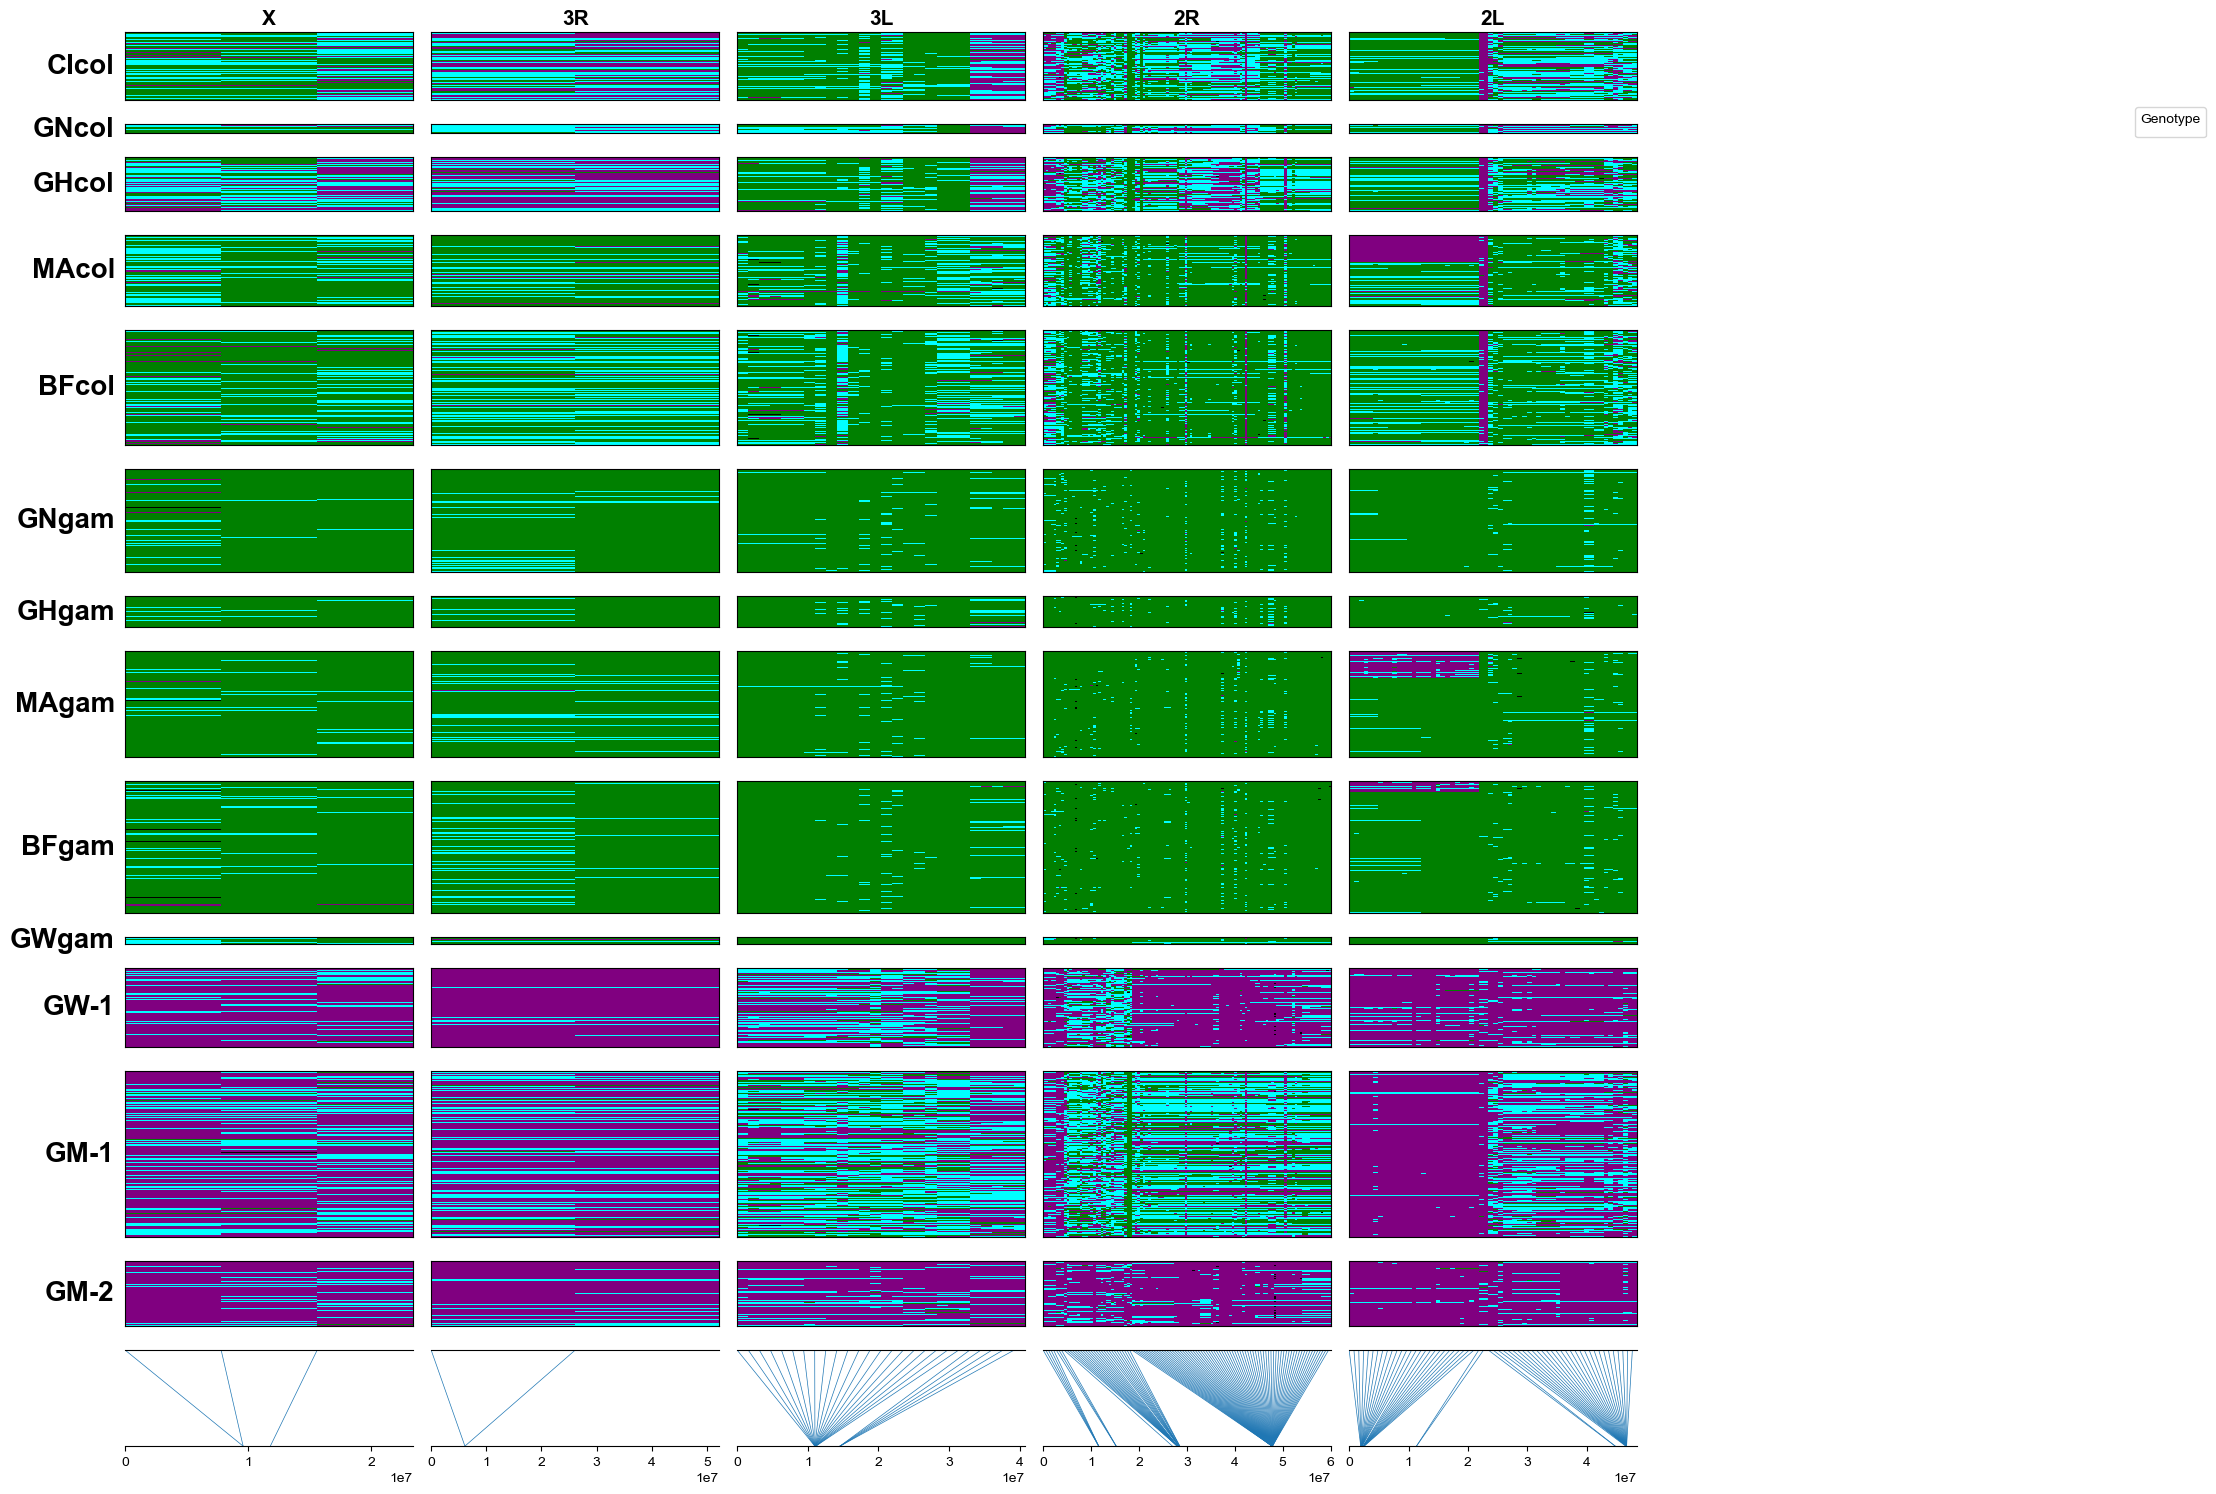

In [114]:
plot_magnum()

In [57]:
t_ap = pd.read_csv('../Data/AP_freq_gm2.csv', sep = '\t')
t_ap

,sample_id,country,population,Freq_alleleGA,Freq_alleleGM2
0,AB0085-Cx,Burkina Faso,BFgam,0.955,0.045
1,AB0086-Cx,Burkina Faso,BFgam,0.955,0.045
2,AB0087-C,Burkina Faso,BFcol,0.818,0.182
3,AB0088-C,Burkina Faso,BFcol,0.891,0.109
4,AB0089-Cx,Burkina Faso,BFcol,0.881,0.119
...,...,...,...,...,...
1185,AJ0060-C,Guinea-Bissau,GW-1,0.139,0.861
1186,AJ0068-C,Guinea-Bissau,GW-1,0.264,0.736
1187,AJ0080-C,Guinea-Bissau,GW-1,0.060,0.940
1188,AJ0087-C,Guinea-Bissau,GW-1,0.393,0.607


---------------------------

# Sandbox
## Tennessen SNPs

In [12]:
d={}

In [23]:
## chrom 2
chrom= '2R'
pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
ref = ag3.snp_sites(chrom, 'REF', site_mask='gamb_colu').compute()
alt = ag3.snp_sites(chrom, 'ALT', site_mask='gamb_colu')[:,0].compute()
gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
pos_tenessen = [254010,273505,436659,494186,528634,538934,910700,5440409,6752808,6772242,6775346,6780612,6874859,7567517,7855289,7856055,23070067,23431554,23437547,23463082,23480856,23481971,23508777,23534610,23539359,23540463,23547294,23548651,23555925,23579923,23583342,23590996,23594562]
gt = gt.subset(sel0= pos.locate_keys(pos_tenessen), sel1 = sel1)
gt = gt.subset(sel1 = sel2)
allele_counts = gt.count_alleles_subpops(subpops)
ac_gm2 = allele_counts['GM_2']
ac_ga = allele_counts['An_gam']
print('Computing GM-2 Frequencies')
ac_gm2_freq = ac_gm2.to_frequencies().compute().round(decimals=3)
print('Computing GA Frequencies')
ac_ga_freq = ac_ga.to_frequencies().compute().round(decimals=3)
d[chrom] = pd.DataFrame()
d[chrom]['POS'] = pd.Series(pos[pos.locate_keys(pos_tenessen)])
d[chrom]['REF'] = ref[pos.locate_keys(pos_tenessen)]
d[chrom]['ALT']  = alt[pos.locate_keys(pos_tenessen)]
d[chrom]['freq_GM2_alt'] = ac_gm2_freq[:,1]
d[chrom]['freq_GA_alt'] = ac_ga_freq[:,1]
d[chrom]['freq_GM2_ref'] = ac_gm2_freq[:,0]
d[chrom]['freq_GA_ref'] = ac_ga_freq[:,0]
d[chrom]['chrom'] = chrom

[########################################] | 100% Completed | 1.02 sms
[########################################] | 100% Completed | 1.43 sms
[########################################] | 100% Completed | 919.71 ms
[########################################] | 100% Completed | 3.17 sms
[########################################] | 100% Completed | 1.02 sms
[########################################] | 100% Completed | 4.17 sms
[########################################] | 100% Completed | 810.57 ms
[########################################] | 100% Completed | 33.20 s
Computing GM-2 Frequencies
[########################################] | 100% Completed | 3.26 sms
Computing GA Frequencies
[########################################] | 100% Completed | 22.36 s


In [24]:
## chrom 2
chrom= '3R'
pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
ref = ag3.snp_sites(chrom, 'REF', site_mask='gamb_colu').compute()
alt = ag3.snp_sites(chrom, 'ALT', site_mask='gamb_colu')[:,0].compute()
gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
pos_tenessen = [13040298,14783249,14848219,14861699,16115639,16134008]
gt = gt.subset(sel0= pos.locate_keys(pos_tenessen), sel1 = sel1)
gt = gt.subset(sel1 = sel2)
allele_counts = gt.count_alleles_subpops(subpops)
ac_gm2 = allele_counts['GM_2']
ac_ga = allele_counts['An_gam']
print('Computing GM-2 Frequencies')
ac_gm2_freq = ac_gm2.to_frequencies().compute().round(decimals=3)
print('Computing GA Frequencies')
ac_ga_freq = ac_ga.to_frequencies().compute().round(decimals=3)
d[chrom] = pd.DataFrame()
d[chrom]['POS'] = pd.Series(pos[pos.locate_keys(pos_tenessen)])
d[chrom]['REF'] = ref[pos.locate_keys(pos_tenessen)]
d[chrom]['ALT']  = alt[pos.locate_keys(pos_tenessen)]
d[chrom]['freq_GM2_alt'] = ac_gm2_freq[:,1]
d[chrom]['freq_GA_alt'] = ac_ga_freq[:,1]
d[chrom]['freq_GM2_ref'] = ac_gm2_freq[:,0]
d[chrom]['freq_GA_ref'] = ac_ga_freq[:,0]
d[chrom]['chrom'] = chrom

[########################################] | 100% Completed | 3.30 sms
[########################################] | 100% Completed | 4.03 sms
[########################################] | 100% Completed | 1.44 sms
[########################################] | 100% Completed | 4.83 sms
[########################################] | 100% Completed | 1.21 sms
[########################################] | 100% Completed | 5.63 sms
[########################################] | 100% Completed | 813.36 ms
[########################################] | 100% Completed | 27.75 s
Computing GM-2 Frequencies
[########################################] | 100% Completed | 3.46 sms
Computing GA Frequencies
[########################################] | 100% Completed | 17.20 s


In [28]:
## chrom 2
chrom= '3L'
pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
ref = ag3.snp_sites(chrom, 'REF', site_mask='gamb_colu').compute()
alt = ag3.snp_sites(chrom, 'ALT', site_mask='gamb_colu')[:,0].compute()
gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
pos_tenessen = [20669422,20708115,20770338,20772890,20776277,20780609,20952723] #20774603

gt = gt.subset(sel0= pos.locate_keys(pos_tenessen), sel1 = sel1)
gt = gt.subset(sel1 = sel2)
allele_counts = gt.count_alleles_subpops(subpops)
ac_gm2 = allele_counts['GM_2']
ac_ga = allele_counts['An_gam']
print('Computing GM-2 Frequencies')
ac_gm2_freq = ac_gm2.to_frequencies().compute().round(decimals=3)
print('Computing GA Frequencies')
ac_ga_freq = ac_ga.to_frequencies().compute().round(decimals=3)
d[chrom] = pd.DataFrame()
d[chrom]['POS'] = pd.Series(pos[pos.locate_keys(pos_tenessen)])
d[chrom]['REF'] = ref[pos.locate_keys(pos_tenessen)]
d[chrom]['ALT']  = alt[pos.locate_keys(pos_tenessen)]
d[chrom]['freq_GM2_alt'] = ac_gm2_freq[:,1]
d[chrom]['freq_GA_alt'] = ac_ga_freq[:,1]
d[chrom]['freq_GM2_ref'] = ac_gm2_freq[:,0]
d[chrom]['freq_GA_ref'] = ac_ga_freq[:,0]
d[chrom]['chrom'] = chrom

[########################################] | 100% Completed | 812.44 ms
[########################################] | 100% Completed | 1.03 sms
[########################################] | 100% Completed | 1.15 sms
[########################################] | 100% Completed | 2.26 sms
[########################################] | 100% Completed | 614.46 ms
[########################################] | 100% Completed | 2.89 sms
[########################################] | 100% Completed | 609.36 ms
[########################################] | 100% Completed | 6.41 ss
Computing GM-2 Frequencies
[########################################] | 100% Completed | 712.43 ms
Computing GA Frequencies
[########################################] | 100% Completed | 3.96 ss


In [29]:
## chrom 2
chrom= 'X'
pos = allel.SortedIndex(ag3.snp_sites(chrom, 'POS', site_mask='gamb_colu').compute())
ref = ag3.snp_sites(chrom, 'REF', site_mask='gamb_colu').compute()
alt = ag3.snp_sites(chrom, 'ALT', site_mask='gamb_colu')[:,0].compute()
gt = ag3.snp_genotypes(chrom, site_mask='gamb_colu', sample_sets=["AG1000G-BF-A", "AG1000G-BF-B", "AG1000G-BF-C", "AG1000G-CI", "AG1000G-GH", "AG1000G-GM-A", "AG1000G-GM-B", 
             "AG1000G-GM-C", "AG1000G-GN-A", "AG1000G-GN-B", "AG1000G-ML-A", "AG1000G-ML-B", "AG1000G-GW"])
gt = allel.GenotypeDaskArray(gt)
pos_tenessen = [3930767,4076741] #20774603
gt = gt.subset(sel0= pos.locate_keys(pos_tenessen), sel1 = sel1)
gt = gt.subset(sel1 = sel2)
allele_counts = gt.count_alleles_subpops(subpops)
ac_gm2 = allele_counts['GM_2']
ac_ga = allele_counts['An_gam']
print('Computing GM-2 Frequencies')
ac_gm2_freq = ac_gm2.to_frequencies().compute().round(decimals=3)
print('Computing GA Frequencies')
ac_ga_freq = ac_ga.to_frequencies().compute().round(decimals=3)
d[chrom] = pd.DataFrame()
d[chrom]['POS'] = pd.Series(pos[pos.locate_keys(pos_tenessen)])
d[chrom]['REF'] = ref[pos.locate_keys(pos_tenessen)]
d[chrom]['ALT']  = alt[pos.locate_keys(pos_tenessen)]
d[chrom]['freq_GM2_alt'] = ac_gm2_freq[:,1]
d[chrom]['freq_GA_alt'] = ac_ga_freq[:,1]
d[chrom]['freq_GM2_ref'] = ac_gm2_freq[:,0]
d[chrom]['freq_GA_ref'] = ac_ga_freq[:,0]
d[chrom]['chrom'] = chrom

[########################################] | 100% Completed | 1.64 sms
[########################################] | 100% Completed | 1.75 sms
[########################################] | 100% Completed | 714.91 ms
[########################################] | 100% Completed | 2.34 sms
[########################################] | 100% Completed | 713.68 ms
[########################################] | 100% Completed | 2.90 sms
[########################################] | 100% Completed | 509.59 ms
[########################################] | 100% Completed | 8.34 ss
Computing GM-2 Frequencies
[########################################] | 100% Completed | 1.22 sms
Computing GA Frequencies
[########################################] | 100% Completed | 5.28 ss


In [30]:
df = pd.concat([v for k,v in d.items()])

In [33]:
df_tengrela = df[['chrom','POS','REF','ALT','freq_GM2_ref','freq_GM2_alt']]
df_tengrela

,chrom,POS,REF,ALT,freq_GM2_ref,freq_GM2_alt
0,2R,254010,b'A',b'C',1.000,0.0
1,2R,273505,b'T',b'A',1.000,0.0
2,2R,436659,b'C',b'A',1.000,0.0
3,2R,494186,b'C',b'A',0.994,0.0
4,2R,528634,b'C',b'A',1.000,0.0
5,2R,538934,b'T',b'A',1.000,0.0
6,2R,910700,b'T',b'A',1.000,0.0
7,2R,5440409,b'G',b'A',1.000,0.0
8,2R,6752808,b'C',b'A',1.000,0.0
9,2R,6772242,b'T',b'A',1.000,0.0


In [34]:
df_tengrela.to_csv('tengrela_gm2_snps.csv', sep='\t')